# Demo of projected gradient

Author : Alexandre Gramfort, Telecom ParisTech

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

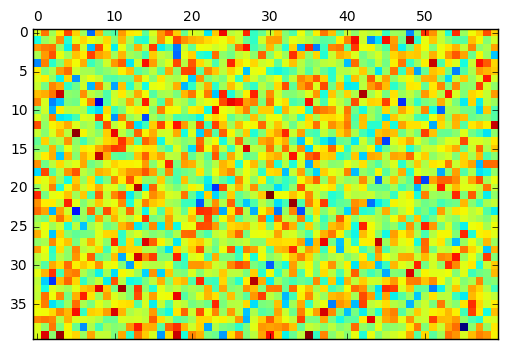

In [2]:
n, N = 40, 60
A = np.random.randn(n, N)
plt.matshow(A)

In [3]:
x = np.zeros(N)
x[10] = 30
x[44] = -20
b = np.dot(A, x)
b += 0.1 * np.random.randn(n)

In [4]:
b.shape

(40,)

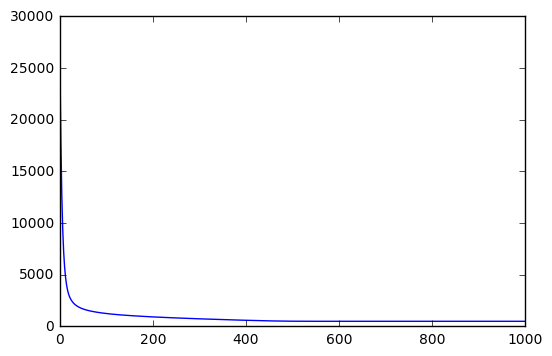

In [5]:
T = np.c_[A, -A]
c = np.ones(2 * N)
lambd = 10.

def pobj(z):
    return (0.5 * np.linalg.norm(b - np.dot(T, z)) ** 2
            + lambd * np.dot(c.T, z))

def grad(z):
    return - np.dot(T.T, b - np.dot(T, z)) + lambd * c

z = np.zeros(2 * N)
rho = 0.001

all_pobj = []

for k in range(1000):
    z = z - rho * grad(z)
    z[z < 0.] = 0.
    all_pobj.append(pobj(z))

plt.plot(all_pobj);

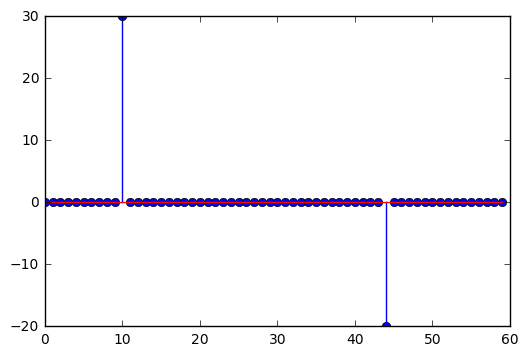

In [6]:
plt.stem(x);

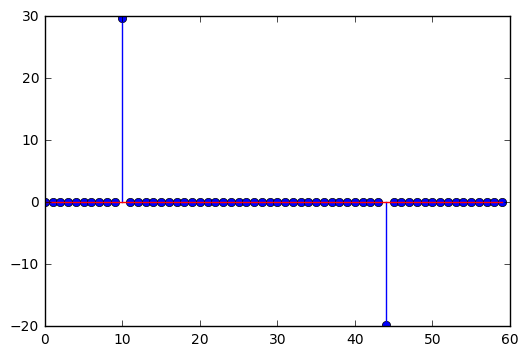

In [7]:
x_hat = z[:N] - z[N:]
plt.stem(x_hat);